<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 3 - contenido </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Técnicas de ensamblado: bagging, boosting, random forest
* Aprendizaje no supervisado: * clustering (K means, mezcla de guasianas), autoencoders
* Aprendizaje sobre secuencias
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 21 de Diciembre (11:55 hrs)
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea3-INF393-II-2018]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) aaa

<a id="primero"></a>
## 1. Problema con ensamblados


Dataset? (ojalá desbalanceado y con ruido)
* Calidad de vino (regresión o clasificación): http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names


Con qué tecnica funciona mejor un ensamblador de arboles de decisión?
* Bagging
* AdaBoost
* Random Forest
* Xgboost
o solo probar los ensamblados con distintos learners?

> Visualice qué sucede al aumentar el número de ensamblados con las distintas técnicas

> Pruebe otra algoritmo de aprendizaje y compare

> Compare las formas de resolver el problema (decisiones que conlleva y resultados)

> Cómo combinar los valores que entregan los ensamblados? (predicciones). Compare con lo que se hace actualmente, Majority voting para clasificación, promedio para regresión

> Seleccione $k$ características para entrenar un modelo A en base a los ensamblados, defina alguna métrica para ésto.



In [164]:
#https://xgboost.readthedocs.io/en/latest/python/python_api.html
import xgboost as xgb
# read in data
#dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
#dtest = xgb.DMatrix('demo/data/agaricus.txt.test')

dtrain = xgb.DMatrix(data=X,label=np.ones(8))
# specify parameters via map
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' ,'n_estimators':10 }
#eta is learning rate
#objective ='reg:linear'
#'objective': 'multi:softprob','num_class': 3  # error evaluation for multiclass training 

In [170]:
model = xgb.XGBClassifier(**param)
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1, subsample=1)

In [171]:
model.fit(X,np.ones(8))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=1, subsample=1)

In [172]:
# make prediction
preds = model.predict(X)
preds

array([1., 1., 1., 1., 1., 1., 1., 1.])

## 2. Aprendizaje en secuencias

Dataset:
* (regresión) international airline passengers (https://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/)
* (clasificacion)

Instalar HMM (*Hidden Markov Model*)
```
pip install --upgrade hmmlearn
conda install -c omnia hmmlearn
```

> Probar una cadena markov
```python
print "Hola Mundo
```



> Pruebe una regresión (lineal o no, decida cuál) con la misma "ventana" o información que se entrega a la cadena de markov (Regresión por ventana para series de tiempo) 

In [69]:
#https://hmmlearn.readthedocs.io/en/latest/tutorial.html#available-models
#X debería ser una sola secuencia de valores observados
from hmmlearn import hmm
import numpy as np
np.random.seed(30)

"""Para variable categorica:
from hmmlearn.hmm import MultinomialHMM
MultinomialHMM(n_components=2)
"""

X = np.asarray([1,2.5,3.5,1,2,2.,2.5,3.5])
X = X.reshape(-1,1) #debe ser un arreglo (N,1)

n_state = 3
## creo que las cadenas son de primer orden (solo el estado anterior)
remodel = hmm.GaussianHMM(n_components=n_state, covariance_type="full", n_iter=100) #cov type puede ser diag
remodel.fit(X)  

GaussianHMM(algorithm='viterbi', covariance_type='full', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

### qué pasa al aumentar mucho el número de estados?? (cada estado corresponderá a un valor único del dataset)

In [70]:
X_state = remodel.predict(X) #predice el estado, no el valor
X_state

array([2, 0, 1, 2, 0, 0, 0, 1])

In [151]:
from scipy.stats import norm

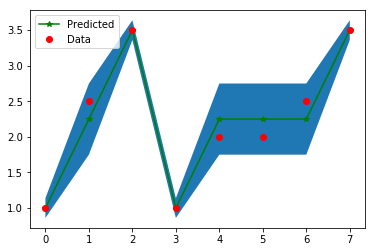

In [153]:
plt.fill_between(np.arange(X.shape[0]),remodel.means_[X_state][:,0]-1.96*np.sqrt(remodel.covars_[X_state])[:,0,0],
                 remodel.means_[X_state][:,0]+1.96*np.sqrt(remodel.covars_[X_state])[:,0,0])#,label="Predicted")
plt.plot(remodel.means_[X_state][:,0],'g*-',label="Predicted")
plt.plot(X,'ro',label="Data")
plt.legend()
plt.show()

In [154]:
X_output = norm( remodel.means_[X_state], remodel.covars_[X_state][:,0] ).rvs() #rvs is sample
X_output

array([[0.99913007],
       [2.3388364 ],
       [3.49748699],
       [0.99529085],
       [2.29979665],
       [2.36570501],
       [2.29740317],
       [3.50106228]])

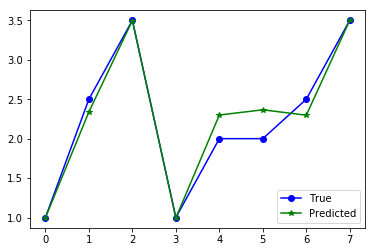

In [155]:
import matplotlib.pyplot as plt
plt.plot(X,'bo-',label="True")
plt.plot(X_output,'g*-',label="Predicted")
plt.legend()
plt.show()

In [73]:
X_probas = remodel.predict_proba(X) #gran diferencia si se hace una regresión
X_probas.shape

(8, 3)

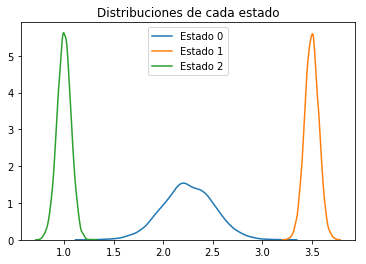

In [128]:
import seaborn as sns
for i in range(n_state):
    r = norm(remodel.means_[i], np.sqrt( remodel.covars_[i,0])).rvs(10000)
    sns.distplot(r,kde=True, hist=False,label="Estado "+str(i))
plt.legend()
plt.title("Distribuciones de cada estado")
plt.show()

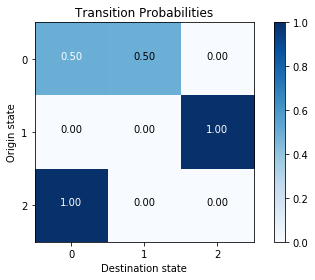

In [93]:
import itertools
def plot_state_matrix(cm, states,title='Transition Probabilities',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(states))
    plt.xticks(tick_marks, states)
    plt.yticks(tick_marks, states)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
    plt.ylabel('Origin state')
    plt.xlabel('Destination state')
    plt.tight_layout()
plot_state_matrix(remodel.transmat_,np.arange(n_state))

#### predecir por montones

In [35]:
n_sample = 100
X_value, Z_value = remodel.sample(n_sample) #X es el valor continuo, Z es el estado (discreto)
X_value

array([[0.93238395],
       [2.37665922],
       [3.49598615],
       [0.95744257],
       [1.90618985],
       [1.98652759],
       [2.00260603],
       [2.4743123 ],
       [3.60572185],
       [0.93146202],
       [2.54348444],
       [3.42406657],
       [0.96302904],
       [2.49828508],
       [3.51635755],
       [0.9814085 ],
       [2.55251898],
       [3.55496963],
       [1.01730428],
       [1.9138853 ],
       [2.05888393],
       [2.44670225],
       [3.29060504],
       [0.91103979],
       [2.49353806],
       [3.5402151 ],
       [1.02053551],
       [2.56216709],
       [3.43617908],
       [0.98522548],
       [2.46184282],
       [3.59888223],
       [1.10698063],
       [1.87821771],
       [2.54548971],
       [3.54325071],
       [1.03143662],
       [2.50337132],
       [3.3989068 ],
       [0.95764195],
       [1.95480081],
       [2.60143088],
       [3.61941574],
       [0.94448707],
       [2.46348546],
       [3.4575728 ],
       [1.04180555],
       [2.501

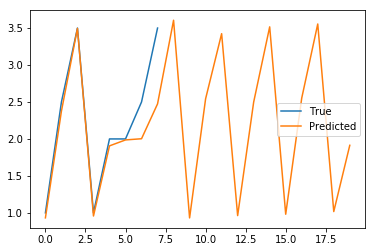

In [68]:
plt.plot(X,label="True")
plt.plot(X_value[:20],label="Predicted")
plt.legend()
plt.show()